## Concepts

#### PCA
The first principal component explains most of the variance in the data.

#### CAPM
$r_i = r_f + B_i(r_M - r_f) + e_i$ <br>
risk-free + market + idiosyncratic <br>
r_m-r_f) (measures the excess return of the market with respect to the risk-free asset <br>
beta_i (measures the degree to which the asset is affected by the market factor) <br>

#### Connecting the two
When applying PCA to daily stock returns, the first principal component approximates the market factor.

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from sklearn.decomposition import PCA
from ue.uexp.dataprocessing.processor_binance import BinanceProcessor

In [3]:
### get data (set config params)
ticker_list = ["BTCUSDT","ETHUSDT","SOLUSDT", "DOGEUSDT", "SHIBUSDT", "LUNAUSDT", "BNBUSDT"]
start_date = "2021-12-30"
end_date = "2021-12-31"
time_interval = "1m"

p = BinanceProcessor("binance")
df = p.download_data(ticker_list, start_date, end_date, time_interval)
#df = df[['time','close']]

for t in df.tic.unique():
    df[t] = df[df['tic'] == t]['close']
    
df = df[['time'] + list(df.tic.unique())]

df['time'] = pd.to_datetime(df['time'])
df.set_index('time', inplace=True)
df

/Users/dan/Desktop/projects/uexp/ue/uexp/dataprocessing/processor_binance.py:130: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = final_df.append(new_df)
/Users/dan/Desktop/projects/uexp/ue/uexp/dataprocessing/processor_binance.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = final_df.append(df)
/Users/dan/Desktop/projects/uexp/ue/uexp/dataprocessing/processor_binance.py:130: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = final_df.append(new_df)
/Users/dan/Desktop/projects/uexp/ue/uexp/dataprocessing/processor_binance.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = final_df.append(df)
/U

,BTCUSDT,ETHUSDT,SOLUSDT,DOGEUSDT,SHIBUSDT,LUNAUSDT,BNBUSDT
time,,,,,,,
2021-12-30 00:00:00,46768.36,3675.94,171.16,0.1704,0.000034,82.76,515.6
2021-12-30 00:01:00,46756.41,3673.38,171.07,0.1702,0.000033,82.67,515.3
2021-12-30 00:02:00,46752.86,3671.35,171.10,0.1701,0.000033,82.61,515.5
2021-12-30 00:03:00,46762.44,3670.80,171.09,0.1701,0.000033,82.62,515.6
2021-12-30 00:04:00,46776.73,3672.61,171.10,0.1702,0.000033,82.75,515.9
...,...,...,...,...,...,...,...
2021-12-30 16:34:00,47120.78,3712.25,172.71,0.1716,0.000034,84.10,518.5
2021-12-30 16:35:00,47047.98,3711.06,172.51,0.1715,0.000034,84.02,517.7
2021-12-30 16:36:00,47029.44,3709.66,172.38,0.1715,0.000034,84.02,517.4


In [4]:
returns = df.pct_change()
returns.dropna(inplace=True)
returns.head()

,BTCUSDT,ETHUSDT,SOLUSDT,DOGEUSDT,SHIBUSDT,LUNAUSDT,BNBUSDT
time,,,,,,,
2021-12-30 00:01:00,-0.000256,-0.000696,-0.000526,-0.001174,-0.001791,-0.001087,-0.000582
2021-12-30 00:02:00,-0.000076,-0.000553,0.000175,-0.000588,-0.000299,-0.000726,0.000388
2021-12-30 00:03:00,0.000205,-0.000150,-0.000058,0.000000,-0.000598,0.000121,0.000194
2021-12-30 00:04:00,0.000306,0.000493,0.000058,0.000588,-0.000599,0.001573,0.000582
2021-12-30 00:05:00,-0.000549,-0.000139,0.000175,-0.000588,0.000599,-0.000363,-0.000582


<AxesSubplot:title={'center':'Minutely Returns of the Selected Cryptos'}, xlabel='time'>

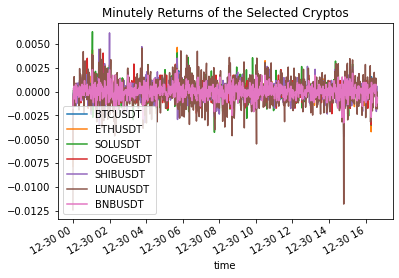

In [5]:
returns.plot(title='Minutely Returns of the Selected Cryptos')

<AxesSubplot:title={'center':'Cumulative Returns of the Selected Cryptos'}, xlabel='time'>

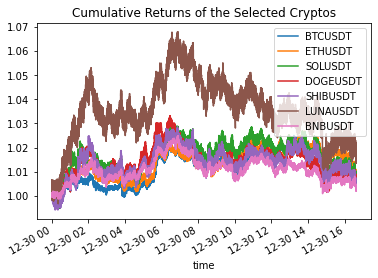

In [8]:
crs = returns.cumsum().apply(np.exp)
crs.plot(title='Cumulative Returns of the Selected Cryptos')

<AxesSubplot:title={'center':'First Principal Component of the S&P500'}>

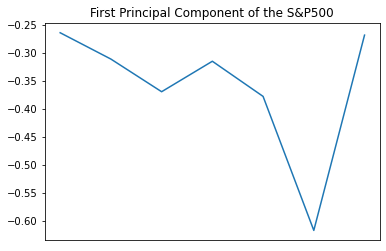

In [9]:
from sklearn.decomposition import PCA
pca = PCA(1).fit(returns.fillna(0))
pc1 = pd.Series(index=returns.columns, data=pca.components_[0])
pc1.plot(xticks=[], title='First Principal Component of the Set of Selected Cryptos')

#### what does rs_df do?

<AxesSubplot:xlabel='time'>

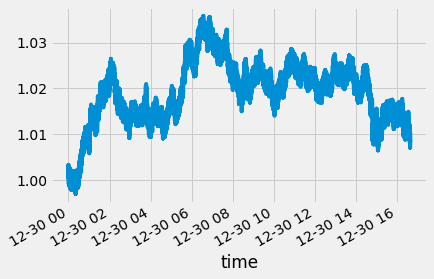

In [16]:
weights = abs(pc1)/sum(abs(pc1))
myrs = (weights*returns).sum(1)
myrs.cumsum().apply(np.exp).plot()

### [index for cryptos](https://www.spglobal.com/spdji/en/index-family/digital-assets/cryptocurrency/#overview)

In [19]:
#prices = yf.download(['SPY'], start='2020-01-01')['Adj Close']
#market_rs = prices.apply(np.log).diff(1)
# using S&P Crypto LargeCap Ex-MegaCap Index
#3.94% return
market_rs = 0.0394

In [12]:
# weights = abs(pc1)/sum(abs(pc1)) # l1norm = 1
# myrs = (weights*returns).sum(1)
# print(myrs)
# rs_df = pd.concat([myrs, market_rs], 1)
# rs_df.columns = ["PCA Portfolio", "S&P500"]

# rs_df.dropna().cumsum().apply(np.exp).plot(subplots=True, figsize=(10,6), grid=True, linewidth=3);
# plt.tight_layout()
# plt.savefig('tmp.png')

time
2021-12-30 00:01:00   -0.000932
2021-12-30 00:02:00   -0.000305
2021-12-30 00:03:00   -0.000045
2021-12-30 00:04:00    0.000532
2021-12-30 00:05:00   -0.000183
                         ...   
2021-12-30 16:34:00   -0.001452
2021-12-30 16:35:00   -0.001152
2021-12-30 16:36:00   -0.000171
2021-12-30 16:37:00   -0.000608
2021-12-30 16:38:00   -0.001141
Length: 6992, dtype: float64


NameError: name 'market_rs' is not defined